In [1]:
print(__doc__)

# Code source adapted from: Jaques Grobler
# License: BSD 3 clause

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import os
import csv
import pprint
import time
import itertools
import NeuralNetworkModel as NNM
import LogisticRegressionModel as LRM
import SoftmaxRegressionModel as SRM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pp = pprint.PrettyPrinter(indent=4)

Automatically created module for IPython interactive environment


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
# Read and treat training dataset
dataset_train = pandas.read_csv('fashion-mnist-dataset/fashion-mnist_train.csv').values #np.genfromtxt('fashion-mnist-dataset/fashion-mnist_train.csv', delimiter=',')
y_true = dataset_train[:,0]
dataset_train = np.delete(dataset_train, 0, 1).T
dataset_train = dataset_train / dataset_train.max()

# Read and treat test dataset
dataset_test = pandas.read_csv('fashion-mnist-dataset/fashion-mnist_test.csv').values
target_test = dataset_test[:,0]
dataset_test = np.delete(dataset_test, 0, 1).T
dataset_test = dataset_test / dataset_test.max()

# Separate train dataset in Train and Validation Data
half = len(y_true)//2

data_train = dataset_train[:,:half]
target_train = y_true[:half]
data_val = dataset_train[:,half:]
target_val = y_true[half:]

In [4]:
#######################################
#######                         #######
#######     Neural Network      #######
#######                         #######  
#######################################

neural_model_sigmoid_1 = NNM.Model(data_train, target_train, activation="sigmoid", epochs=1, alpha=0.1, l_hidden=1, hidden_neurons=512, batch_size=1, use_softmax=False, epsilon = 0.5)

for i in range(20):
    neural_model_sigmoid_1.fit()

    neural_y_pred = neural_model_sigmoid_1.Predict(data_val, target_val)
    print(confusion_matrix(target_val, neural_y_pred))
    print(classification_report(target_val, neural_y_pred))

Predicting: 100%|██████████| 30000/30000 [00:52<00:00, 573.48it/s] 


[[2510   10  207   97    7    9   74    0   49    0]
 [  13 2866   60   55    2    0    1    0    1    0]
 [  30    1 2500   16  366    2   75    0   18    0]
 [ 157   29  152 2489  105    1   29    0   25    0]
 [  18    2  815  120 1959    2  169    0   15    0]
 [   1    0    1    1    0 2915    0   77   11   12]
 [ 648    4  758   62  255    1 1178    1   55    0]
 [   0    0    0    0    0  144    0 2780    4   16]
 [   7    2  112    6   10   11   29   13 2817    0]
 [   0    0    0    1    1  270    0  490    5 2246]]
             precision    recall  f1-score   support

          0       0.74      0.85      0.79      2963
          1       0.98      0.96      0.97      2998
          2       0.54      0.83      0.66      3008
          3       0.87      0.83      0.85      2987
          4       0.72      0.63      0.67      3100
          5       0.87      0.97      0.91      3018
          6       0.76      0.40      0.52      2962
          7       0.83      0.94      0.88  

Predicting: 100%|██████████| 30000/30000 [00:51<00:00, 585.99it/s]


[[2083   23   81  138   14    8  591    0   24    1]
 [   6 2915   20   48    6    0    2    0    1    0]
 [  10    3 2535   25  293    2  136    0    4    0]
 [  44   35   63 2562  190    2   86    0    5    0]
 [   3    4  511   74 2426    0   80    0    2    0]
 [   1    0    1    3    0 2891    0   64    5   53]
 [ 247    9  460   63  486    1 1674    0   22    0]
 [   0    0    0    0    0  111    0 2700    3  130]
 [   5    3   64   15   27   25   75    9 2782    2]
 [   0    0    1    0    0   31    0   92    2 2887]]
             precision    recall  f1-score   support

          0       0.87      0.70      0.78      2963
          1       0.97      0.97      0.97      2998
          2       0.68      0.84      0.75      3008
          3       0.88      0.86      0.87      2987
          4       0.70      0.78      0.74      3100
          5       0.94      0.96      0.95      3018
          6       0.63      0.57      0.60      2962
          7       0.94      0.92      0.93  

Predicting: 100%|██████████| 30000/30000 [00:59<00:00, 505.20it/s]


[[2340    6   29   40   16    4  475    0   52    1]
 [  13 2917   10   32    9    0   14    0    3    0]
 [  18    0 2393   12  267    1  297    0   20    0]
 [ 126   24   19 2395  192    1  201    0   29    0]
 [   5    4  443   44 2371    0  220    0   13    0]
 [   2    0    0    1    0 2840    0  101   10   64]
 [ 343    2  281   32  269    0 1983    0   51    1]
 [   0    0    0    0    0   57    0 2779    7  101]
 [   5    2    5    4   18    6   49    9 2908    1]
 [   0    0    1    0    0   23    0   90    3 2896]]
             precision    recall  f1-score   support

          0       0.82      0.79      0.80      2963
          1       0.99      0.97      0.98      2998
          2       0.75      0.80      0.77      3008
          3       0.94      0.80      0.86      2987
          4       0.75      0.76      0.76      3100
          5       0.97      0.94      0.95      3018
          6       0.61      0.67      0.64      2962
          7       0.93      0.94      0.94  

Predicting: 100%|██████████| 30000/30000 [00:51<00:00, 580.55it/s]


[[2323   13   29   31    4    6  524    0   32    1]
 [   8 2934    5   33    4    0   12    0    2    0]
 [  41    1 2321   15  206    1  413    0   10    0]
 [ 141   37   16 2435  142    1  197    0   18    0]
 [   3    7  334   56 2097    0  593    0   10    0]
 [   2    0    0    1    0 2905    0   63    7   40]
 [ 292    8  184   30  108    0 2303    0   36    1]
 [   0    0    0    0    0   84    0 2792    5   63]
 [   8    2    6    5   10   12   68   12 2883    1]
 [   0    0    1    1    0   25    0  115    2 2869]]
             precision    recall  f1-score   support

          0       0.82      0.78      0.80      2963
          1       0.98      0.98      0.98      2998
          2       0.80      0.77      0.79      3008
          3       0.93      0.82      0.87      2987
          4       0.82      0.68      0.74      3100
          5       0.96      0.96      0.96      3018
          6       0.56      0.78      0.65      2962
          7       0.94      0.95      0.94  

Predicting: 100%|██████████| 30000/30000 [00:46<00:00, 648.22it/s]


[[2240    7   22   55   16    3  579    1   39    1]
 [  17 2929    2   33    8    0    7    0    2    0]
 [  26    2 2013   31  563    1  358    0   14    0]
 [  93   23    8 2580  141    1  123    0   18    0]
 [   4    7  114   80 2653    0  231    0   11    0]
 [   1    0    0    3    0 2852    0   97    7   58]
 [ 221    6  159   48  264    1 2223    0   39    1]
 [   0    0    0    0    0   44    0 2817    5   78]
 [   6    1    2   11   16    7   43   12 2908    1]
 [   0    1    0    0    0   21    0  103    2 2886]]
             precision    recall  f1-score   support

          0       0.86      0.76      0.80      2963
          1       0.98      0.98      0.98      2998
          2       0.87      0.67      0.76      3008
          3       0.91      0.86      0.89      2987
          4       0.72      0.86      0.78      3100
          5       0.97      0.94      0.96      3018
          6       0.62      0.75      0.68      2962
          7       0.93      0.96      0.94  

Predicting: 100%|██████████| 30000/30000 [00:52<00:00, 573.94it/s]


[[2471   11   50  108   19    4  265    0   34    1]
 [   7 2930    6   45    8    0    1    0    1    0]
 [  37    1 2342   38  460    1  122    0    7    0]
 [  73   19   18 2674  134    2   54    0   13    0]
 [   4    7  208  101 2677    0   97    0    6    0]
 [   1    0    0    3    0 2900    0   51    6   57]
 [ 398    9  300   86  372    0 1771    0   25    1]
 [   0    0    0    0    0   74    0 2701    5  164]
 [   9    2   21   13   31   11   29    8 2882    1]
 [   0    0    0    0    0   19    0   51    2 2941]]
             precision    recall  f1-score   support

          0       0.82      0.83      0.83      2963
          1       0.98      0.98      0.98      2998
          2       0.80      0.78      0.79      3008
          3       0.87      0.90      0.88      2987
          4       0.72      0.86      0.79      3100
          5       0.96      0.96      0.96      3018
          6       0.76      0.60      0.67      2962
          7       0.96      0.92      0.94  

Predicting: 100%|██████████| 30000/30000 [00:53<00:00, 559.55it/s]


[[2514   11   34   76    7    4  278    0   38    1]
 [  10 2928    7   46    2    0    3    0    2    0]
 [  57    1 2394   38  285    1  219    0   13    0]
 [ 101   16   15 2703   62    2   72    0   16    0]
 [   6    7  295  172 2366    0  241    0   13    0]
 [   1    0    0    3    0 2899    0   68    7   40]
 [ 402    6  227   69  178    1 2046    0   33    0]
 [   0    0    0    0    0   70    0 2794    5   75]
 [   9    2    7   13    9    8   41   11 2906    1]
 [   0    1    0    1    0   27    0   99    2 2883]]
             precision    recall  f1-score   support

          0       0.81      0.85      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.80      0.80      0.80      3008
          3       0.87      0.90      0.89      2987
          4       0.81      0.76      0.79      3100
          5       0.96      0.96      0.96      3018
          6       0.71      0.69      0.70      2962
          7       0.94      0.95      0.94  

Predicting: 100%|██████████| 30000/30000 [00:49<00:00, 608.49it/s]


[[2597   10   49   47    9    4  216    0   30    1]
 [  14 2927    9   41    5    0    1    0    1    0]
 [  47    0 2494   23  273    1  164    0    6    0]
 [ 126   20   32 2589  140    2   62    0   16    0]
 [   8    6  304   77 2534    0  166    0    5    0]
 [   2    0    0    2    0 2907    0   71    5   31]
 [ 449    5  277   56  221    1 1923    0   30    0]
 [   0    0    0    0    0   70    0 2815    5   54]
 [  11    0   20    8   19   13   40    9 2886    1]
 [   0    1    0    1    0   29    0  128    2 2852]]
             precision    recall  f1-score   support

          0       0.80      0.88      0.84      2963
          1       0.99      0.98      0.98      2998
          2       0.78      0.83      0.81      3008
          3       0.91      0.87      0.89      2987
          4       0.79      0.82      0.80      3100
          5       0.96      0.96      0.96      3018
          6       0.75      0.65      0.69      2962
          7       0.93      0.96      0.94  

Predicting: 100%|██████████| 30000/30000 [00:54<00:00, 552.17it/s]


[[2385    9   53   83    9    5  379    0   39    1]
 [   7 2932    9   42    4    0    3    0    1    0]
 [  30    0 2452   31  292    1  192    0   10    0]
 [  76   21   27 2647  112    2   85    0   17    0]
 [   4    6  265   97 2529    0  191    0    8    0]
 [   2    0    0    2    0 2898    0   69    7   40]
 [ 302    6  242   71  212    1 2095    0   33    0]
 [   0    0    0    0    0   68    0 2790    5   81]
 [   7    0   17   12   18   10   34   10 2898    1]
 [   0    1    0    1    0   22    0   87    3 2899]]
             precision    recall  f1-score   support

          0       0.85      0.80      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.80      0.82      0.81      3008
          3       0.89      0.89      0.89      2987
          4       0.80      0.82      0.81      3100
          5       0.96      0.96      0.96      3018
          6       0.70      0.71      0.71      2962
          7       0.94      0.95      0.95  

Predicting: 100%|██████████| 30000/30000 [00:53<00:00, 557.18it/s]


[[2506   10   42   90    9    4  262    0   39    1]
 [   8 2932    9   43    3    0    2    0    1    0]
 [  43    0 2443   41  292    1  178    0   10    0]
 [  93   20   22 2685   85    2   64    0   16    0]
 [   5    7  274  142 2468    0  194    0   10    0]
 [   2    0    0    2    0 2896    0   79    5   34]
 [ 386    7  234   82  201    1 2016    0   35    0]
 [   0    0    0    0    0   59    0 2821    5   59]
 [   8    0   17   14   13   11   34   13 2896    1]
 [   0    0    0    2    0   23    0  122    2 2864]]
             precision    recall  f1-score   support

          0       0.82      0.85      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.80      0.81      0.81      3008
          3       0.87      0.90      0.88      2987
          4       0.80      0.80      0.80      3100
          5       0.97      0.96      0.96      3018
          6       0.73      0.68      0.71      2962
          7       0.93      0.96      0.94  

Predicting: 100%|██████████| 30000/30000 [00:43<00:00, 694.01it/s]


[[2559    9   48   67   10    4  227    0   38    1]
 [   9 2928    9   44    5    0    2    0    1    0]
 [  45    0 2478   31  301    1  143    0    9    0]
 [ 106   18   30 2648  106    2   60    0   17    0]
 [   6    6  296  102 2551    0  131    0    8    0]
 [   2    0    0    2    0 2905    0   71    5   33]
 [ 436    3  280   67  246    1 1894    0   35    0]
 [   0    0    0    0    0   74    0 2804    5   61]
 [   8    0   19   12   16   12   30   11 2898    1]
 [   0    0    0    1    0   26    0  120    2 2864]]
             precision    recall  f1-score   support

          0       0.81      0.86      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.78      0.82      0.80      3008
          3       0.89      0.89      0.89      2987
          4       0.79      0.82      0.81      3100
          5       0.96      0.96      0.96      3018
          6       0.76      0.64      0.70      2962
          7       0.93      0.95      0.94  

Predicting: 100%|██████████| 30000/30000 [00:48<00:00, 620.36it/s]


[[2515    9   46   67    8    4  277    0   36    1]
 [   8 2931    9   42    5    0    2    0    1    0]
 [  43    0 2465   32  282    1  175    0   10    0]
 [ 100   19   26 2654  102    2   67    0   17    0]
 [   6    6  299  109 2504    0  168    0    8    0]
 [   2    0    0    2    0 2896    0   75    5   38]
 [ 387    3  255   66  209    1 2009    0   32    0]
 [   0    0    0    0    0   63    0 2811    5   65]
 [   8    0   17   13   15   11   31   11 2900    1]
 [   0    0    0    1    0   23    0  106    2 2881]]
             precision    recall  f1-score   support

          0       0.82      0.85      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.79      0.82      0.80      3008
          3       0.89      0.89      0.89      2987
          4       0.80      0.81      0.80      3100
          5       0.97      0.96      0.96      3018
          6       0.74      0.68      0.71      2962
          7       0.94      0.95      0.95  

Predicting: 100%|██████████| 30000/30000 [00:45<00:00, 665.16it/s]


[[2468   10   50   71    8    4  311    0   40    1]
 [   8 2932    9   41    5    0    2    0    1    0]
 [  35    0 2463   32  285    1  181    0   11    0]
 [  90   20   27 2654  104    2   73    0   17    0]
 [   4    6  298  104 2511    0  168    0    9    0]
 [   2    0    0    2    0 2897    0   75    5   37]
 [ 352    5  251   67  214    1 2037    0   35    0]
 [   0    0    0    0    0   66    0 2808    5   65]
 [   7    0   17   13   15   11   29   11 2903    1]
 [   0    0    0    0    0   24    0  102    2 2885]]
             precision    recall  f1-score   support

          0       0.83      0.83      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.79      0.82      0.80      3008
          3       0.89      0.89      0.89      2987
          4       0.80      0.81      0.80      3100
          5       0.96      0.96      0.96      3018
          6       0.73      0.69      0.71      2962
          7       0.94      0.95      0.95  

Predicting: 100%|██████████| 30000/30000 [00:56<00:00, 530.89it/s]


[[2476    9   48   69    7    4  310    0   39    1]
 [   8 2930    9   42    5    0    3    0    1    0]
 [  36    0 2481   30  259    1  190    0   11    0]
 [  92   20   26 2651  102    2   77    0   17    0]
 [   5    6  315  105 2475    0  184    0   10    0]
 [   2    0    0    2    0 2896    0   75    5   38]
 [ 358    4  253   64  201    1 2048    0   33    0]
 [   0    0    0    0    0   62    0 2812    5   65]
 [   7    0   17   13   15   11   32   12 2899    1]
 [   0    0    0    0    0   22    0  102    2 2887]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.79      0.82      0.81      3008
          3       0.89      0.89      0.89      2987
          4       0.81      0.80      0.80      3100
          5       0.97      0.96      0.96      3018
          6       0.72      0.69      0.71      2962
          7       0.94      0.96      0.95  

Predicting: 100%|██████████| 30000/30000 [00:43<00:00, 687.94it/s]


[[2471    9   44   74    8    4  314    0   38    1]
 [   8 2929    9   43    5    0    3    0    1    0]
 [  37    0 2451   31  283    1  194    0   11    0]
 [  89   19   24 2663   97    2   76    0   17    0]
 [   5    6  285  112 2501    0  182    0    9    0]
 [   2    0    0    2    0 2896    0   74    5   39]
 [ 356    3  232   68  209    1 2060    0   33    0]
 [   0    0    0    0    0   65    0 2806    5   68]
 [   7    0   16   13   15   11   33   13 2898    1]
 [   0    0    0    1    0   22    0   99    2 2889]]
             precision    recall  f1-score   support

          0       0.83      0.83      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.80      0.81      0.81      3008
          3       0.89      0.89      0.89      2987
          4       0.80      0.81      0.80      3100
          5       0.96      0.96      0.96      3018
          6       0.72      0.70      0.71      2962
          7       0.94      0.95      0.95  

Predicting: 100%|██████████| 30000/30000 [00:43<00:00, 685.92it/s]


[[2498    9   44   69    8    4  292    0   38    1]
 [   8 2929    9   43    5    0    3    0    1    0]
 [  40    0 2462   31  279    1  184    0   11    0]
 [  94   19   24 2660   97    2   74    0   17    0]
 [   5    6  289  112 2496    0  182    0   10    0]
 [   2    0    0    2    0 2895    0   76    5   38]
 [ 368    3  237   68  211    1 2041    0   33    0]
 [   0    0    0    0    0   61    0 2813    5   65]
 [   7    0   16   13   15   11   32   13 2899    1]
 [   0    0    0    1    0   22    0  103    2 2885]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.80      0.82      0.81      3008
          3       0.89      0.89      0.89      2987
          4       0.80      0.81      0.80      3100
          5       0.97      0.96      0.96      3018
          6       0.73      0.69      0.71      2962
          7       0.94      0.96      0.95  

Predicting: 100%|██████████| 30000/30000 [00:44<00:00, 678.09it/s]


[[2500    9   44   69    8    4  290    0   38    1]
 [   8 2930    9   43    5    0    2    0    1    0]
 [  39    0 2444   31  297    1  185    0   11    0]
 [  97   20   24 2650  103    2   74    0   17    0]
 [   5    6  266  106 2536    0  172    0    9    0]
 [   2    0    0    2    0 2896    0   75    5   38]
 [ 372    3  227   65  220    1 2040    0   34    0]
 [   0    0    0    0    0   62    0 2812    5   65]
 [   7    0   16   13   15   11   32   13 2899    1]
 [   0    0    0    1    0   22    0  102    2 2886]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.81      0.81      0.81      3008
          3       0.89      0.89      0.89      2987
          4       0.80      0.82      0.81      3100
          5       0.97      0.96      0.96      3018
          6       0.73      0.69      0.71      2962
          7       0.94      0.96      0.95  

Predicting: 100%|██████████| 30000/30000 [00:52<00:00, 572.62it/s]


[[2492    9   45   69    8    4  297    0   38    1]
 [   8 2930    9   43    5    0    2    0    1    0]
 [  39    0 2460   31  283    1  183    0   11    0]
 [  92   20   25 2658   99    2   74    0   17    0]
 [   5    6  291  111 2504    0  173    0   10    0]
 [   2    0    0    2    0 2896    0   75    5   38]
 [ 368    3  243   67  213    1 2033    0   34    0]
 [   0    0    0    0    0   64    0 2810    5   65]
 [   7    0   16   13   15   11   32   13 2899    1]
 [   0    0    0    1    0   22    0  101    2 2887]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.80      0.82      0.81      3008
          3       0.89      0.89      0.89      2987
          4       0.80      0.81      0.80      3100
          5       0.97      0.96      0.96      3018
          6       0.73      0.69      0.71      2962
          7       0.94      0.95      0.95  

Predicting: 100%|██████████| 30000/30000 [00:50<00:00, 599.38it/s]


[[2495    9   44   70    8    4  294    0   38    1]
 [   8 2930    9   43    5    0    2    0    1    0]
 [  39    0 2457   31  286    1  183    0   11    0]
 [  92   19   24 2659   99    2   75    0   17    0]
 [   5    6  283  112 2509    0  175    0   10    0]
 [   2    0    0    2    0 2896    0   75    5   38]
 [ 370    3  230   67  215    1 2042    0   34    0]
 [   0    0    0    0    0   65    0 2808    5   66]
 [   7    0   16   13   15   11   32   13 2899    1]
 [   0    0    0    1    0   22    0  101    2 2887]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.80      0.82      0.81      3008
          3       0.89      0.89      0.89      2987
          4       0.80      0.81      0.80      3100
          5       0.96      0.96      0.96      3018
          6       0.73      0.69      0.71      2962
          7       0.94      0.95      0.95  

Predicting: 100%|██████████| 30000/30000 [00:56<00:00, 527.79it/s]


[[2496    9   44   70    8    4  293    0   38    1]
 [   8 2930    9   43    5    0    2    0    1    0]
 [  39    0 2452   31  293    1  181    0   11    0]
 [  93   19   24 2658  100    2   74    0   17    0]
 [   5    6  274  110 2524    0  171    0   10    0]
 [   2    0    0    2    0 2896    0   75    5   38]
 [ 370    3  229   68  220    1 2037    0   34    0]
 [   0    0    0    0    0   65    0 2809    5   65]
 [   7    0   16   13   15   11   32   13 2899    1]
 [   0    0    0    1    0   22    0  101    2 2887]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.80      0.82      0.81      3008
          3       0.89      0.89      0.89      2987
          4       0.80      0.81      0.81      3100
          5       0.96      0.96      0.96      3018
          6       0.73      0.69      0.71      2962
          7       0.94      0.95      0.95  

In [5]:
## Result with Sigmoid, 512 hidden neurons and 1 hidden layer VALIDATION
neural_y_pred_val = neural_model_sigmoid_1.Predict(data_val, target_val)
neural_conf_matrix_val = confusion_matrix(target_val, neural_y_pred_val)
neural_class_report_val = classification_report(target_val, neural_y_pred_val)
print(neural_conf_matrix_val)
print(neural_class_report_val)

Predicting: 100%|██████████| 30000/30000 [00:42<00:00, 709.73it/s]


[[2496    9   44   70    8    4  293    0   38    1]
 [   8 2930    9   43    5    0    2    0    1    0]
 [  39    0 2452   31  293    1  181    0   11    0]
 [  93   19   24 2658  100    2   74    0   17    0]
 [   5    6  274  110 2524    0  171    0   10    0]
 [   2    0    0    2    0 2896    0   75    5   38]
 [ 370    3  229   68  220    1 2037    0   34    0]
 [   0    0    0    0    0   65    0 2809    5   65]
 [   7    0   16   13   15   11   32   13 2899    1]
 [   0    0    0    1    0   22    0  101    2 2887]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.83      2963
          1       0.99      0.98      0.98      2998
          2       0.80      0.82      0.81      3008
          3       0.89      0.89      0.89      2987
          4       0.80      0.81      0.81      3100
          5       0.96      0.96      0.96      3018
          6       0.73      0.69      0.71      2962
          7       0.94      0.95      0.95  

Confusion matrix, without normalization
[[2496    9   44   70    8    4  293    0   38    1]
 [   8 2930    9   43    5    0    2    0    1    0]
 [  39    0 2452   31  293    1  181    0   11    0]
 [  93   19   24 2658  100    2   74    0   17    0]
 [   5    6  274  110 2524    0  171    0   10    0]
 [   2    0    0    2    0 2896    0   75    5   38]
 [ 370    3  229   68  220    1 2037    0   34    0]
 [   0    0    0    0    0   65    0 2809    5   65]
 [   7    0   16   13   15   11   32   13 2899    1]
 [   0    0    0    1    0   22    0  101    2 2887]]


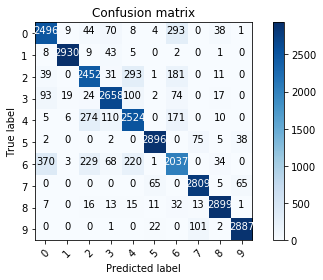

In [6]:
plt.figure()
plot_confusion_matrix(neural_conf_matrix_val, np.arange(10))
plt.savefig("cm_sigmoid_1h_val.png")
plt.show()

In [7]:
## Result with sigmoid, 512 hidden neurons and 1 hidden layer TEST
neural_y_pred = neural_model_sigmoid_1.Predict(dataset_test, target_test)
neural_conf_matrix = confusion_matrix(target_test, neural_y_pred)
neural_class_report = classification_report(target_test, neural_y_pred)
print(neural_conf_matrix)
print(neural_class_report)

Predicting: 100%|██████████| 10000/10000 [00:13<00:00, 768.62it/s]


[[838   2  14  20   1   3 110   0  12   0]
 [  4 979   3  11   0   2   1   0   0   0]
 [ 13   0 789  14  97   0  79   0   8   0]
 [ 23  12   9 901  27   1  22   0   5   0]
 [  1   2  68  26 853   0  49   0   1   0]
 [  1   0   0   0   0 940   0  34   5  20]
 [136   5  66  21  69   0 692   0  11   0]
 [  0   0   0   0   0  19   0 945   0  36]
 [  2   0  11   2   3   4   7   4 967   0]
 [  0   0   0   0   0   6   0  31   1 962]]
             precision    recall  f1-score   support

          0       0.82      0.84      0.83      1000
          1       0.98      0.98      0.98      1000
          2       0.82      0.79      0.81      1000
          3       0.91      0.90      0.90      1000
          4       0.81      0.85      0.83      1000
          5       0.96      0.94      0.95      1000
          6       0.72      0.69      0.71      1000
          7       0.93      0.94      0.94      1000
          8       0.96      0.97      0.96      1000
          9       0.94      0.96      

Confusion matrix, without normalization
[[838   2  14  20   1   3 110   0  12   0]
 [  4 979   3  11   0   2   1   0   0   0]
 [ 13   0 789  14  97   0  79   0   8   0]
 [ 23  12   9 901  27   1  22   0   5   0]
 [  1   2  68  26 853   0  49   0   1   0]
 [  1   0   0   0   0 940   0  34   5  20]
 [136   5  66  21  69   0 692   0  11   0]
 [  0   0   0   0   0  19   0 945   0  36]
 [  2   0  11   2   3   4   7   4 967   0]
 [  0   0   0   0   0   6   0  31   1 962]]


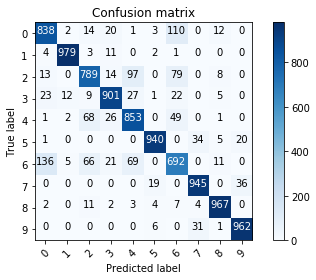

In [8]:
plt.figure()
plot_confusion_matrix(neural_conf_matrix, np.arange(10))
plt.savefig("cm_sigmoid_test.png")
plt.show()